## Supplementary material for "A Simple Electrostatic Model for the Hard-Sphere Solute Component of Nonpolar Solvation"
### Comparison with Tan, Tan, and Luo (2007)
#### Christopher D. Cooper and Jaydeep P. Bardhan

This Jupyter notebook explores results from solvation free energy calculations using an implicit solvent model from the paper "A Simple Electrostatic Model for the Hard-Sphere Solute Component of Nonpolar Solvation", and molecular dynamics from Mobley et al. "Small Molecule Hydration Free Energies in Explicit Solvent: An Extensive Test of Fixed-Charge Atomistic Simulations" (2009). The test set corresponds to 497 small solutes from D. Mobley's paper.

The code reads in the files `implicit_data.txt` and `explicit_data.txt` which are available in the Supplementary Material. These are CSV files with the names and different free energy components for the 497 molecules. 

In [3]:
import numpy
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [87]:

def plot_correl(X, Y, names, key='None', title='Energy', xlabel='X-axis', ylabel='Y-axis'):
    """
    Uses plotly to do scatter plot of correlation between two datasets
    Inputs:
    -------
        X    : (array of float) data in X axis
        Y    : (array of float) data in Y axis
        names: (array of string) molecule names
        key  : (string) highlight points that contain 'key' in the name
        title: (string) title of the plot. Defaults to 'Energy'
        xlabel: (string) x label of the plot
    Output:
    -------
        Plotly scatter plot with hover tags
        Correlation statistics
    """
    key_true = []
    for i in range(len(names)):
        if key in names[i]:
            key_true.append("red")
        else:
            key_true.append("blue")

    trace = go.Scatter(
                x = X,
                y = Y,
                text = names,
                mode='markers',
                marker = dict(size=8,
                            opacity=0.6, color=key_true),
                hoverinfo = 'text')


    max_val = numpy.max(X)
    min_val = numpy.min(X)
    ref = go.Scatter( x = numpy.array([min_val,max_val]),
                      y = numpy.array([min_val,max_val]),
                      mode = 'lines'
                    )

    data = [trace, ref]
    
    layout= go.Layout(
        title= 'Energy',
        hovermode= 'closest',
        xaxis= dict(
            title= 'MD',
            ticklen= 5,
            zeroline= False,
            gridwidth= 2,
        ),
        yaxis=dict(
            title= 'BEM',
            ticklen= 5,
            gridwidth= 2,
        ),
        showlegend= False
    )
    
    correl = numpy.corrcoef(X, Y)
    rmsd = numpy.sqrt(numpy.sum(numpy.abs(X-Y)**2)/len(X))
    mue = numpy.sum(numpy.abs(X-Y))/len(X)

    print ('Correlation coeff: %1.4f'%correl[0,1])
    print ('RMSD: %1.4f'%rmsd)
    print ('MUE: %1.4f'%mue)
    
    fig= go.Figure(data=data, layout=layout)
    iplot(fig)
        

Here we read in the files...

In [154]:
data = numpy.loadtxt('ala_results_extended.txt', delimiter=',', skiprows=1)
N = data[:,0]
dGex = data[:,1]
dGcav = data[:,2]
dGdisp = data[:,3]
SASA = data[:,4]
#SASA_gromos = data[:,5]

In [155]:
data_gromos = numpy.loadtxt('Results_gromos.csv', delimiter=',', skiprows=1)
N_gromos = data_gromos[:,0]
dGex_ext = data_gromos[:,1]
SASA_gromos_ext = data_gromos[:,3]*100 #(nm2 to ang2)
dGdex_helix = data_gromos[:,4]
SASA_gromos_helix = data_gromos[:,5]*100 #(nm2 to ang2)

In [156]:
dG_i = dGcav + dGdisp

In [157]:
gamma=0.02#0.02#0.06
b =2#2#-3
dGcav_sasa = gamma*SASA_gromos_ext + b
dG_i_sasa = dGcav_sasa + dGdisp

In [158]:
from matplotlib import pyplot

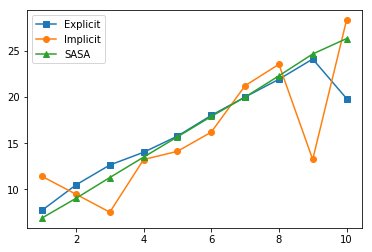

In [159]:
pyplot.plot(N, dGex, marker='s', label='Explicit')
pyplot.plot(N, dG_i, marker='o', label='Implicit')
pyplot.plot(N, dG_i_sasa, marker='^', label='SASA')
pyplot.legend()
pyplot.show()

In [4]:
dG_i = dGes_i + dGcav_i + dGdisp_i
dG_e = dGes_e + dGcav_e + dGdisp_e
dGnp_i = dGcav_i + dGdisp_i
dGnp_e = dGcav_e + dGdisp_e
plot_correl(dGnp_e, dGnp_i, smiles, key='#')

Correlation coeff: 0.8751
RMSD: 0.5483
MUE: 0.3832


In [5]:
gamma=0.06
b = -3
dGcav_sasa = gamma*SASA + b
plot_correl(dGcav_e, dGcav_sasa, iupac)

Correlation coeff: 0.9896
RMSD: 0.5099
MUE: 0.3935


In [6]:
plot_correl(dGcav_e, dGcav_i, iupac)

Correlation coeff: 0.9920
RMSD: 0.4546
MUE: 0.3618


In [7]:
dGnp_sasa = dGcav_sasa + dGdisp_i
dGnp_i = dGcav_i + dGdisp_i
dGnp_e = dGcav_e + dGdisp_e

In [8]:
key_test = 'hexane'
plot_correl(dGnp_e, dGnp_i, iupac, key=key_test)
plot_correl(dGnp_e, dGnp_sasa, iupac, key=key_test)

Correlation coeff: 0.8751
RMSD: 0.5483
MUE: 0.3832


Correlation coeff: 0.8714
RMSD: 0.6413
MUE: 0.4644


In [9]:
plot_correl(dGcav_e, dGcav_sasa, iupac, key='tetrafluoro')

Correlation coeff: 0.9896
RMSD: 0.5099
MUE: 0.3935


In [10]:
plot_correl(dGdisp_e, dGdisp_i, iupac, key='tetrafluoro')

Correlation coeff: 0.9935
RMSD: 0.5002
MUE: 0.3801


In [11]:
dGdisp_ttl = read_dGdisp_tantanluo('tantanluo07_p1.4_rho1.txt', iupac)#, skip=['trichloromethane','chlorodifluoromethane'])
dGdisp_ttl *= 1.45
plot_correl(dGdisp_e, dGdisp_ttl, iupac)

Correlation coeff: 0.9926
RMSD: 0.4407
MUE: 0.3307


In [12]:
dGnp_implicit = dGdisp_ttl + dGcav_sasa
plot_correl(dGnp_e, dGnp_implicit, iupac)

Correlation coeff: 0.8443
RMSD: 0.6425
MUE: 0.4810


In [13]:
plot_correl(dG_e, dG_i, iupac)

Correlation coeff: 0.9697
RMSD: 1.0168
MUE: 0.7164


In [14]:
dG_implicit = dGnp_implicit + dGes_i
plot_correl(dG_e, dG_implicit, iupac)

Correlation coeff: 0.9603
RMSD: 1.0255
MUE: 0.7671


In [42]:
from matplotlib import pyplot
from matplotlib import rc

def generate_mpl_plot(x_data, y_data, x_label, y_label, figname, plot_offset=False):

    rc('font',**{'family':'serif','serif':['Times New Roman']})
    rc('text', usetex=True)

    fig,ax = pyplot.subplots(figsize=(3,3), dpi=80)
    ax.scatter(x_data, y_data, s=5, c='w', edgecolors='k', lw=0.2)
    lims = [
            numpy.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
            numpy.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
           ]
    ax.plot([lims[0],lims[1]],[lims[0],lims[1]], c='k', marker='',ls='--',lw=0.5)
    
    if plot_offset:
        ax.plot([lims[0]+1,lims[1]+1],[lims[0],lims[1]], c='k', marker='',ls=':',lw=0.5)
        ax.plot([lims[0]-1,lims[1]-1],[lims[0],lims[1]], c='k', marker='',ls=':',lw=0.5)

    ax.set_xlim(lims)
    ax.set_ylim(lims)
    
    ax.set_xlabel(x_label, fontname='serif')
    ax.set_ylabel(y_label, fontname='serif')
    ax.set_aspect('equal')
    
    pyplot.subplots_adjust(left=0.2,bottom=0.15,right=0.96,top=0.99)


    fig.savefig(figname)


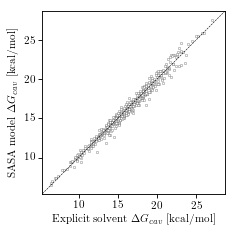

In [43]:
generate_mpl_plot(dGcav_e, dGcav_sasa, 'Explicit solvent $\\Delta G_{cav}$ [kcal/mol]', 'SASA model $\\Delta G_{cav}$ [kcal/mol]', 'dGcav_standard.pdf')

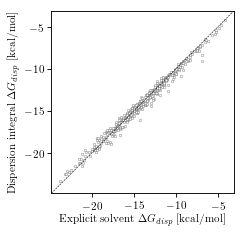

In [44]:
generate_mpl_plot(dGdisp_e, dGdisp_ttl, 'Explicit solvent $\\Delta G_{disp}$ [kcal/mol]', 'Dispersion integral $\\Delta G_{disp}$ [kcal/mol]', 'dGdisp_standard.pdf')

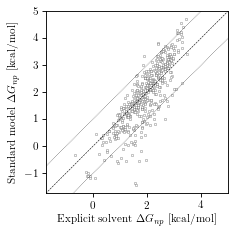

In [45]:
generate_mpl_plot(dGnp_e, dGnp_implicit, 'Explicit solvent $\\Delta G_{np}$ [kcal/mol]', 'Standard model $\\Delta G_{np}$ [kcal/mol]', 'dGnp_standard.pdf', plot_offset=True)

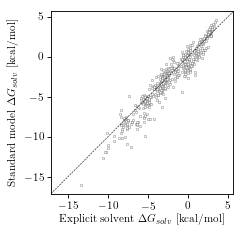

In [46]:
generate_mpl_plot(dG_e, dG_implicit, 'Explicit solvent $\\Delta G_{solv}$ [kcal/mol]', 'Standard model $\\Delta G_{solv}$ [kcal/mol]', 'dG_standard.pdf')